<center><h1>Maharajwala_Raj_HW2</h1></center>
<br>
<br>

Name: Raj Vijay Maharajala 

Github Username: RajMaharajwala

USC ID: 4863-3649-66

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [ ]:
# !pip install plotly
# !pip install cufflinks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly as py
import plotly.express as px
import plotly.tools as tls
import cufflinks as cf
sns.set()

Get the Cycle Power Plant Data Set

In [2]:
# Load all sheets in the Excel file into a dictionary
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')

df

AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]

### (b) Exploring the data

#### i. rows and columns

In [3]:
total_rows = df.shape[0]
total_columns = df.shape[1]
print("Total rows:",total_rows)
print("Total columns:",total_columns)

#print all column names
print("Column Names:",df.columns)

Total rows: 9568
Total columns: 5
Column Names: Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


````
1. Dataset contains 9568 rows which says there are total 9568 data points or records.
2. Dataset contains 5 columns which indicates that there are total 5 attributes or features 
per record, which includes dependent and independent feature.
3. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.
````

#### ii. pairwise scatterplots of all the varianbles

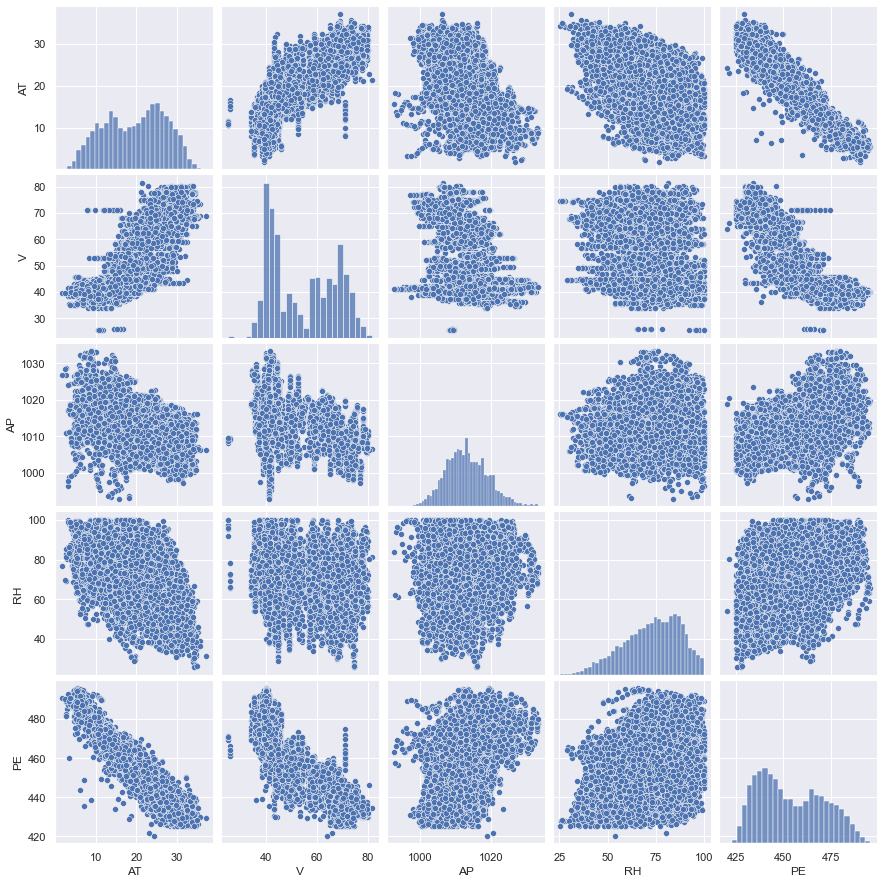

In [4]:
sns.pairplot(df, kind='scatter', palette="mako")
#sns.pairplot(df, kind='scatter', diag_kind='kde' ,palette="mako")

```
Findings from above Pairplot:
1. High Skewness is present in RH, V
2. Lowest skewness is shown in AP
3. V and PE are negatively correlated
4. V and AT are positively correlated
5. PE and AT are negatively correlated
```

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
new_clmn = ['Attributes','Mean','Median','Range','1st Quartile','3rd Quartile','Interquartile Range']
data = []
for clmn in df.columns:
    mean = round(df[clmn].mean(),2)
    median = round(df[clmn].median(),2)
    Range = round(max(df[clmn])-min(df[clmn]),2)
    first_q = round(np.quantile(df[clmn],0.25),2)
    third_q = round(np.quantile(df[clmn],0.75),2)
    inter_q = third_q - first_q
    data.append([clmn,mean,median,Range,first_q,third_q,inter_q])
#print(data)
stats = pd.DataFrame(columns=new_clmn, data = data)
stats.set_index(stats.columns[0], inplace=True)
stats

Mean   Median  Range  1st Quartile  3rd Quartile  \
Attributes                                                        
AT            19.65    20.34  35.30         13.51         25.72   
V             54.31    52.08  56.20         41.74         66.54   
AP          1013.26  1012.94  40.41       1009.10       1017.26   
RH            73.31    74.97  74.60         63.33         84.83   
PE           454.37   451.55  75.50        439.75        468.43   

            Interquartile Range  
Attributes                       
AT                        12.21  
V                         24.80  
AP                         8.16  
RH                        21.50  
PE                        28.68

### (c) Simple Linear Regression
For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

In [6]:
coeff = {}
def LinearRegression_predx(df,clmn):
    x, y = df[clmn].to_numpy(), df['PE'].to_numpy()
    xconst = sm.add_constant(x,prepend=False)
    model = sm.OLS(y,xconst).fit()
    print(model.summary())
    ypred = model.predict(xconst)
    outliers_idx = np.where(model.get_influence().cooks_distance[0] > 4 / len(df))
    df_model = pd.DataFrame({'X_axis': df[clmn].tolist(),'YPred': ypred.tolist()})
    fig, ax = plt.subplots(figsize=(15, 5))
    coeff[clmn] = model.params
    
    Outlier = list(zip(x[outliers_idx], y[outliers_idx]))
    print('\n',pd.DataFrame(Outlier, columns=['X_Outlier','Y_Outlier']))
    
    with plt.style.context('ggplot'):
        ax.plot(df_model['X_axis'], df_model['YPred'], label="Regression Line")
        ax.scatter(x[outliers_idx], y[outliers_idx], label="Outliers" , color='red', alpha = 0.7)
        
    ax.legend()
    ax.set_xlabel(clmn)
    ax.set_ylabel("PE")
    ax.set_title(f'{clmn}: Simple Linear regression', size=20)
    
    

In [7]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:32   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.1713      0.007   -291.715      0.0

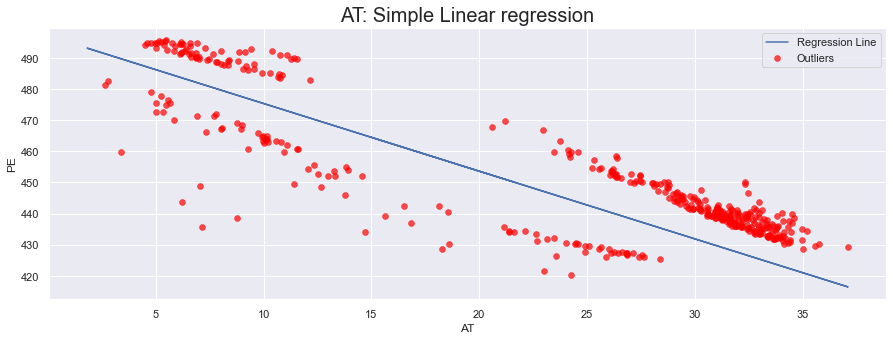

In [8]:
LinearRegression_predx(df,'AT')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:32   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1681      0.007   -172.402      0.0

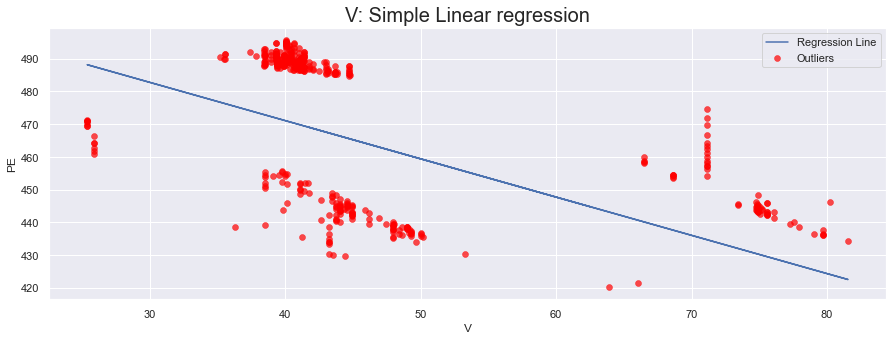

In [9]:
LinearRegression_predx(df,'V')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:32   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4899      0.025     59.296      0.0

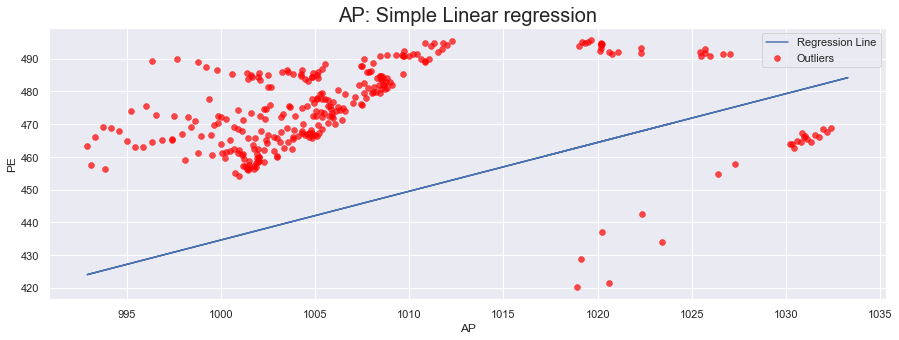

In [10]:
LinearRegression_predx(df,'AP')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:33   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4557      0.011     41.399      0.0

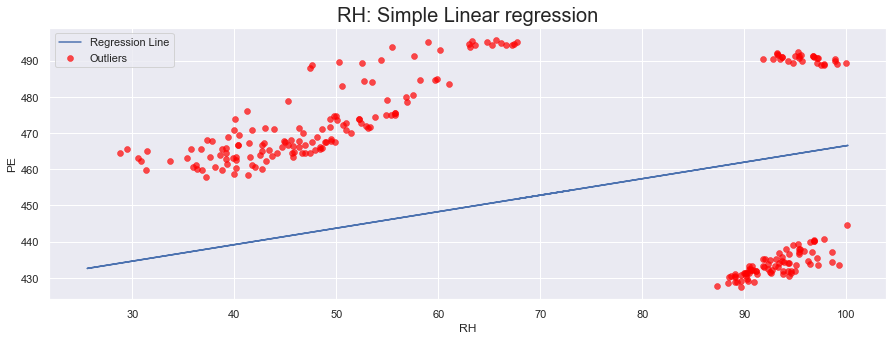

In [11]:
LinearRegression_predx(df,'RH')

~~~
1. In all the above model, association between predictor and response is statistical significant as all have very     small p-value about zero
2. There are outlier for each model ranging from 249 to 416, for now I don't won't to remove these outliers
~~~

### (d) Multiple Regression
Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : Bj = 0?

In [12]:
def MultipleRegression(df):
    x, y = df.iloc[:,:-1].to_numpy() , df['PE'].to_numpy()
    xconst = sm.add_constant(x,prepend=False)
    model = sm.OLS(y,xconst).fit()
    ypred = model.predict(xconst)
    print(ypred)
    print('\n',model.summary())
    return model
    
model_multiple_reg = MultipleRegression(df)

[467.26978996 444.0773659  483.56264263 ... 432.40579787 443.03667582
 449.69603741]

                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:33   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

~~~
Insights: P value for all the variable are about 0 so we can reject the null hypothesis, so all predictors are statistical significant
~~~

### (e) 1c Compare to 1d

In [13]:
dfclmn = pd.DataFrame(df.columns[:-1] , columns=['columns'])
x_list = [coeff[x][0] for x in coeff]
y_list = [x for x in model_multiple_reg.params][:-1]
df_coeff = pd.DataFrame(zip(list(df.columns[:-1]), x_list, y_list) , columns=['columns','Univariate Coefficients of Simple Linear Regression ','Univariate Coefficients of Multiple Regression '])   
fig = px.scatter(df_coeff, x='Univariate Coefficients of Simple Linear Regression ', y='Univariate Coefficients of Multiple Regression ', color="columns" , symbol="columns") 
fig.show()
df_coeff

columns  Univariate Coefficients of Simple Linear Regression   \
0      AT                                          -2.171320      
1       V                                          -1.168135      
2      AP                                           1.489872      
3      RH                                           0.455650      

   Univariate Coefficients of Multiple Regression   
0                                        -1.977513  
1                                        -0.233916  
2                                         0.062083  
3                                        -0.158054

### (f) Nonlinear Association

In [14]:
def Nonlinear_Association_checker(clmn):
    quad = PolynomialFeatures(3) #degree is considered 3 
    Xtrain_quad = quad.fit_transform(df[clmn].to_numpy().reshape(-1, 1))
    #print(Xtrain)
    model = sm.OLS(df["PE"].to_numpy(), Xtrain_quad).fit()
    print(model.summary())

for clmn in df.columns[:-1]:
    print(f'\n\n------------------------------- Feature: {clmn} ----------------------------------\n')
    Nonlinear_Association_checker(clmn)    



------------------------------- Feature: AT ----------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:34   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

```
1. For attribute V we cannot reject the null hypothesis, as p value for x^2 and x^3 is significant large particularly for x^2. This implies that there is no non-linear association of V with PE.

2. For all other predictors (AT,RH, & AP), p value is small enough to reject the null hypothesis therefore there is a possible non-linear association with PE
```

### (g) Interactions of Predictors

In [15]:
model = smf.ols(data = df, formula = 'PE ~ AT + AP + RH + V + AT*AP + AT*RH + AT*V + AP*RH + AP*V + RH*V').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:35   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

```
Insights:
 1. Interaction AT*AP, RH*V has large p value which 0.452, 0.086 which is more than 0.05 so it is not statistically significant.
 2. Interaction AT*V, AT*RH, AP*V has least p value about 0 so they are statistically significant.
 3. Interaction AP*RH have p value about 0.034 considering it to be suitable for statistically significant. 
 4. Likewise Feature V,RH,AP,AT are also statistically significant.
```

### (h) Improvement
Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignicant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test
MSEs.

In [16]:
DFTrainSample, DFTestSample = train_test_split(df, train_size=0.7, shuffle=True, random_state=1)
Xtrain, ytrain = DFTrainSample.iloc[:,:-1] , DFTrainSample['PE']
Xtest, ytest = DFTestSample.iloc[:,:-1] , DFTestSample['PE']

In [17]:
#Model 1
model = smf.ols(data = DFTrainSample, formula = 'PE ~ AT + AP + RH + V').fit()
print(model.summary())
ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)
MSE_train = mean_squared_error(ytrain, ytrain_pred)
MSE_test = mean_squared_error(ytest, ytest_pred)
Dict = {"MSE train":MSE_train,"MSE test":MSE_test}
Report1 = pd.DataFrame(Dict, index=[0])
Report1

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.167e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:35   Log-Likelihood:                -19660.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    458.3988     11.562     39.649      0.0

MSE train   MSE test
0   20.76612  20.777478

In [18]:
#Model 2
model = smf.ols(data = DFTrainSample, formula='PE ~ AT + AP + RH + V + AT*AP + AT*RH + AT*V + AP*RH + AP*V + RH*V + AT**2 + AP**2 + RH**2 + V**2').fit()
print(model.summary())
ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)
MSE_train = mean_squared_error(ytrain, ytrain_pred)
MSE_test = mean_squared_error(ytest, ytest_pred)
Dict = {"MSE train":MSE_train,"MSE test":MSE_test}
Report2 = pd.DataFrame(Dict, index=[0])
Report2

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     9792.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:35   Log-Likelihood:                -19277.
No. Observations:                6697   AIC:                         3.858e+04
Df Residuals:                    6686   BIC:                         3.865e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    650.8953     93.550      6.958      0.0

MSE train   MSE test
0  18.522711  18.626471

In [19]:
#Model 3
#Removed terms 
model = smf.ols(data = DFTrainSample, formula="PE ~ AT + V + AP + RH + AT*RH + AT*V + AP*RH + AT**2 + AP**2 + RH**2").fit()
print(model.summary())
ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)
MSE_train = mean_squared_error(ytrain, ytrain_pred)
MSE_test = mean_squared_error(ytest, ytest_pred)
Dict = {"MSE train":MSE_train,"MSE test":MSE_test}
Report3 = pd.DataFrame(Dict, index=[0])
Report3

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.386e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:35   Log-Likelihood:                -19307.
No. Observations:                6697   AIC:                         3.863e+04
Df Residuals:                    6689   BIC:                         3.868e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.9981     57.487      1.600      0.1

MSE train   MSE test
0  18.690117  18.792834

### (i) KNN

In [20]:
def plot_performance(k_comp, Error_train, Error_test):
    plt.xlabel("1/k")
    plt.ylabel("MSE")
    plt.plot(k_comp, Error_train, label="Train MSE")
    plt.plot(k_comp, Error_test, label="Test MSE")
    plt.legend()
    plt.show()

def KNN_MSE(X_train, y_train, X_test, y_test):
    Error_train, Error_test, k_comp, i_min = [], [], [], 0
    for k in range(1, 101):
        k_comp.append(1 / k)
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        MSE_train = mean_squared_error(y_train, train_predictions)
        MSE_test = mean_squared_error(y_test, test_predictions)
        Error_train.append(MSE_train)
        Error_test.append(MSE_test)
        if MSE_test < Error_test[i_min]:
            i_min = k - 1
    results = [round((1 / k_comp[i_min]), 3), round(Error_train[i_min], 3), round(Error_test[i_min], 3)]
    results = pd.DataFrame([results] , columns=["k","MSE train","MSE test"])
    plot_params = [k_comp, Error_train, Error_test]
    return results, plot_params

KNN without Normalization

In [21]:
results_raw, plot_params = KNN_MSE(Xtrain, ytrain, Xtest, ytest)
results_raw

k  MSE train  MSE test
0  5.0     10.553    15.705

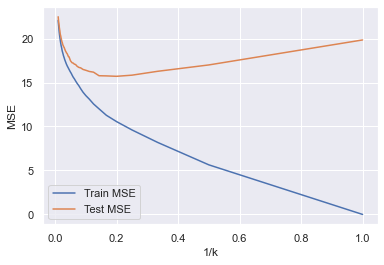

In [22]:
k_comp = plot_params[0]
train_errors = plot_params[1]
test_errors = plot_params[2]

plot_performance(k_comp, train_errors, test_errors)

KNN with Normalization

In [23]:
minMaxScaler = preprocessing.MinMaxScaler()
Xtrain_normalized = pd.DataFrame(minMaxScaler.fit_transform(Xtrain))
Xtest_normalized = pd.DataFrame(minMaxScaler.fit_transform(Xtest))

results_normalised, plot_params = KNN_MSE(Xtrain_normalized, ytrain, Xtest_normalized, ytest)
results_normalised

k  MSE train  MSE test
0  7.0     11.012    14.911

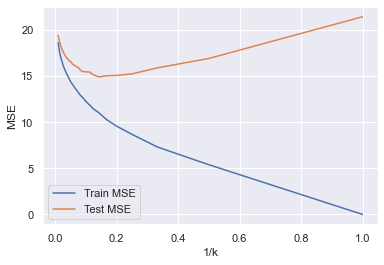

In [24]:
k_comp = plot_params[0]
train_errors = plot_params[1]
test_errors = plot_params[2]

plot_performance(k_comp, train_errors, test_errors)

### (j) Compare KNN and Linear

In [25]:
#KNN
KNN_Type = ["Raw","Normalised"]
KNN_df = pd.concat([results_raw, results_normalised], axis=0, ignore_index=True)
KNN_df.insert(loc=0, column="KNN Type", value=KNN_Type)
KNN_df

KNN Type    k  MSE train  MSE test
0         Raw  5.0     10.553    15.705
1  Normalised  7.0     11.012    14.911

In [26]:
#Linear Regration
Linear_Type = ["All Predictors","Pred + Interaction + Quadractic", "Removed Insignificant"]
Linear_df = pd.concat([Report1.iloc[:,:], Report2.iloc[:,:], Report3.iloc[:,:]], axis=0, ignore_index=True)
Linear_df.insert(loc=0, column="Linear Reg Type", value=Linear_Type)
Linear_df

Linear Reg Type  MSE train   MSE test
0                   All Predictors  20.766120  20.777478
1  Pred + Interaction + Quadractic  18.522711  18.626471
2            Removed Insignificant  18.690117  18.792834

```
On comparing the results of KNN Regression with the linear regression model(that has the smallest test error) it is   sure that KNN perform better less MSE for train and test. This can be possible owing to complex and varied pattern of data that deviates from a straight line (linear) for certain essential predictors.
```

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

An inflexible statistical learning method can result in underfitting when dealing with a large sample size and a limited number of predictors. On the other hand, a more flexible model will demonstrate superior performance in comparison to a inflexible model.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

The likelihood of overfitting is significant, and any patterns identified through flexible model are more likely to be just noise. Hence, inflexible model will perform well compared to flexible model.

### (c) The relationship between the predictors and response is highly non-linear.

In cases where the data model is highly non-linear, a nonflexible model will not have the capability to accommodate the variations. As a result, a flexible model will show better performance compared to a non-flexible model.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

A high variance results in a higher amount of noise, causing a flexible model to overfit. Overfitting is undesirable, making a nonflexible statistical model perform better than a flexible one in this situation.

## 3. ISLR: 2.4.7

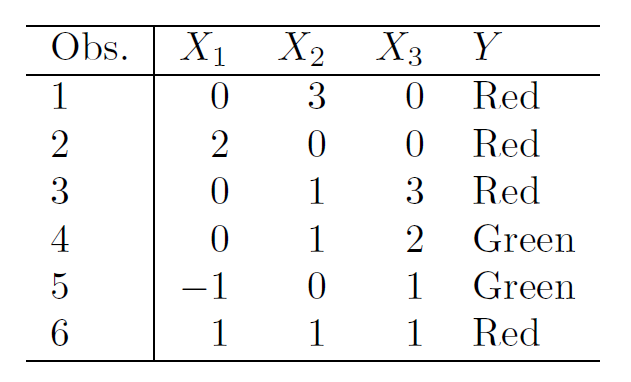

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [27]:
X1 = [0,2,0,0,-1,1]
X2 = [3,0,1,1,0,1]
X3 = [0,0,3,2,1,1]
Y = ['Red','Red','Red','Green','Green','Red']
X = list(zip(X1,X2,X3))
test_point = [(0,0,0)]
tp_List = [(0,0,0)]*6

Result = euclidean_distances(X, test_point)
Result_modified = [Result[i][0] for i in range(len(Result))]
#print("Observations:", X)

xyz = pd.DataFrame([X, Y, tp_List, Result_modified]).T
xyz = xyz.rename(columns={0:'Observation: (X1,X2,X3)' , 1:'Y', 2:'test point', 3:'Euclidean Distance'})
xyz.index = xyz.index + 1
xyz

Observation: (X1,X2,X3)      Y test point Euclidean Distance
1               (0, 3, 0)    Red  (0, 0, 0)                3.0
2               (2, 0, 0)    Red  (0, 0, 0)                2.0
3               (0, 1, 3)    Red  (0, 0, 0)           3.162278
4               (0, 1, 2)  Green  (0, 0, 0)           2.236068
5              (-1, 0, 1)  Green  (0, 0, 0)           1.414214
6               (1, 1, 1)    Red  (0, 0, 0)           1.732051

### (b) What is our prediction with K = 1? Why?

```
Since k=1 and euclidean distance from test point (0,0,0) is much closer to Observation 5 (-1,0,1) 
which is of green color, so the test point will be green.
```

### (c) What is our prediction with K = 3? Why?

```
Since k=3 and 3 neighbours close from test point with respect to euclidean distance are:
Observation 5 (-1,0,1) which is green, 
Observation 6 (1,1,1) which is Red,
Observation 2 (2,0,0) which is also Red
Based on majority the test point will belongs to Red
```

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

```
Best k value would be small

1. If the Bayes boundary is highly nonlinear, it implies that there is limited benefit in generalizing further due to high variance, hence the optimal value for K would be minimal.
2. K is inversely proportional to the flexibility
```